In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("/Users/admin/git_projects/football/data_collection/serie_a_weather.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()


def assign_season(date):
    if date.month >= 8:
        return f"{date.year}/{date.year + 1}"
    else:
        return f"{date.year - 1}/{date.year}"

df['season'] = df['Date'].apply(assign_season)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Columns: 160 entries, game_id to wind_speed_10m_max
dtypes: datetime64[ns](1), float64(150), object(9)
memory usage: 8.0+ MB


/var/folders/cz/tsrtpglj4x3fc4dskw2pnjrc0000gn/T/ipykernel_14247/1744183948.py:1: DtypeWarning: Columns (49,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/admin/git_projects/football/data_collection/serie_a_weather.csv")
/var/folders/cz/tsrtpglj4x3fc4dskw2pnjrc0000gn/T/ipykernel_14247/1744183948.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


## Distributions

In [52]:
df.tail()

,game_id,Div,Date,HomeTeam,TG,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AvgCAHH,AvgCAHA,city_name,lat,lon,temperature_2m_max,temperature_2m_min,precipitation_sum,wind_speed_10m_max,season
6569,759933a4,serie_a,2021-05-23,Bologna,5.0,Juventus,1.0,4.0,A,0.0,...,2.00,1.87,Bologna,44.493820,11.342633,NaN,NaN,NaN,NaN,2020/2021
6570,c7a65d4e,serie_a,2021-05-23,Napoli,2.0,Verona,1.0,1.0,D,0.0,...,1.98,1.89,Napoli,40.835885,14.248768,NaN,NaN,NaN,NaN,2020/2021
6571,c816cecd,serie_a,2021-05-23,Sassuolo,2.0,Lazio,2.0,0.0,H,1.0,...,1.94,1.93,Sassuolo,44.540977,10.782902,NaN,NaN,NaN,NaN,2020/2021
6572,6336a168,serie_a,2021-05-23,Spezia,4.0,Roma,2.0,2.0,D,2.0,...,1.91,1.95,La Spezia,44.238366,9.691233,NaN,NaN,NaN,NaN,2020/2021
6573,61c13358,serie_a,2021-05-23,Torino,2.0,Benevento,1.0,1.0,D,1.0,...,2.06,1.81,Torino,45.067755,7.682489,NaN,NaN,NaN,NaN,2020/2021


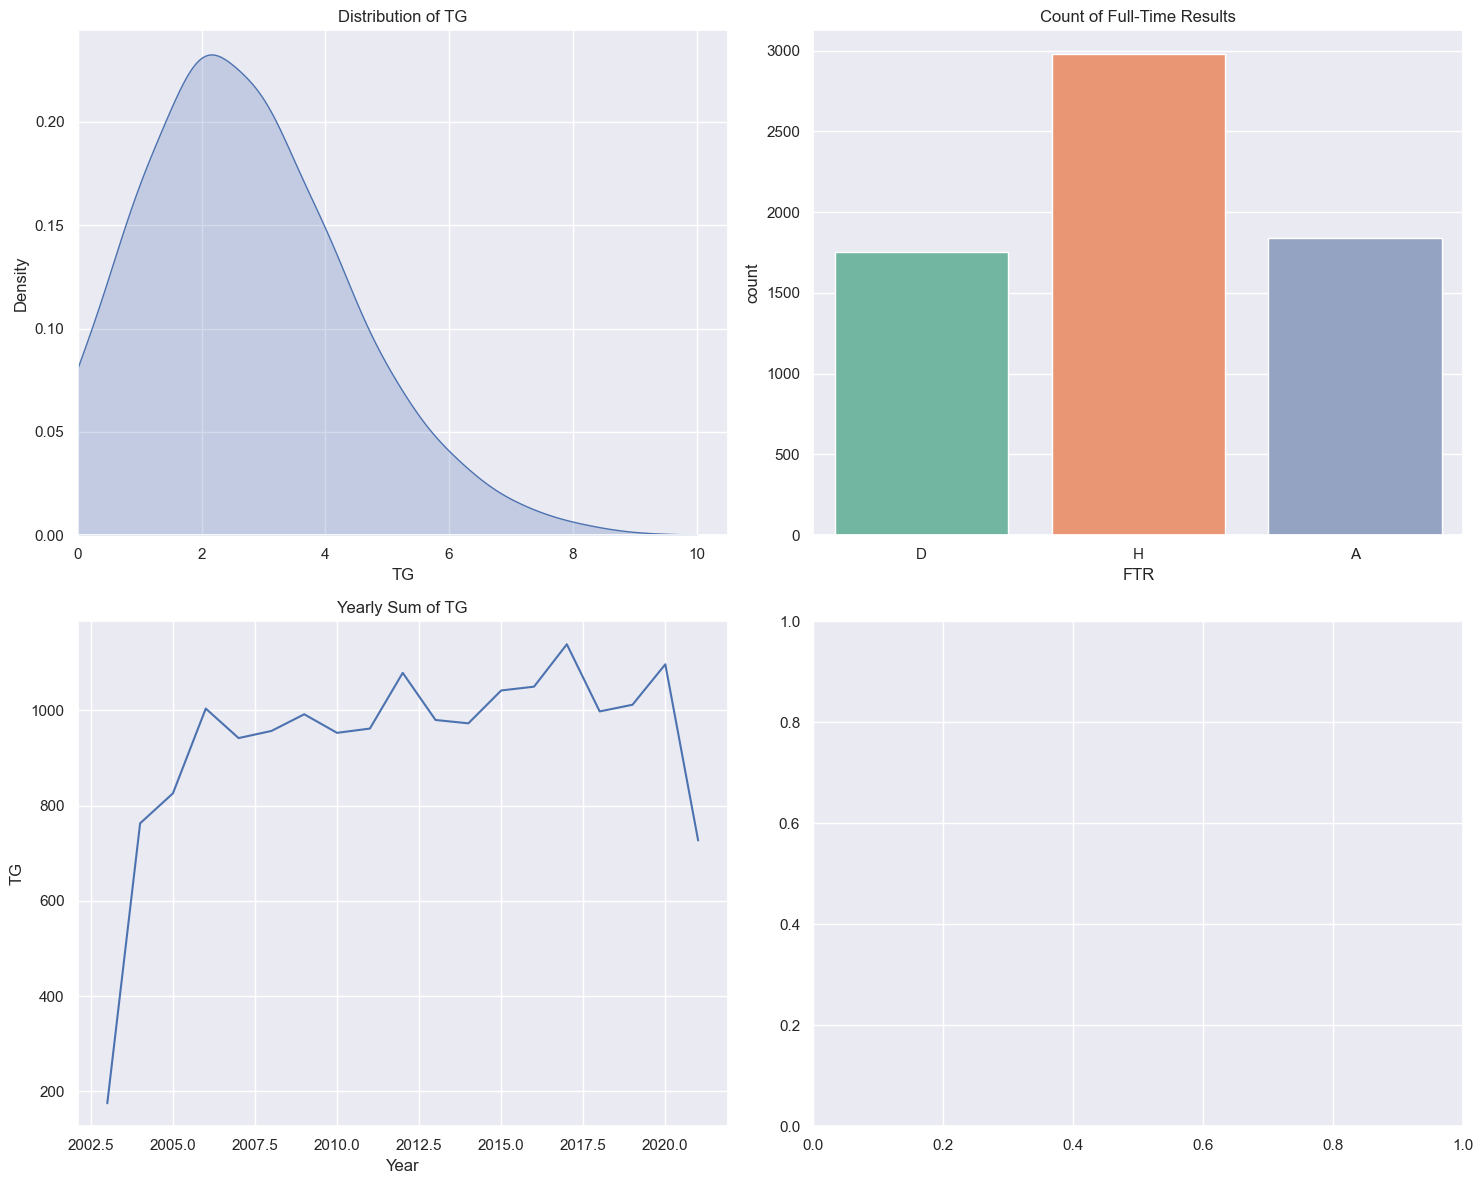

In [47]:
sns.set_theme()

f, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjusted figsize for better visibility

# KDE plot for 'TG'
sns.kdeplot(data=df, x='TG', cut=0, bw_adjust=2, ax=axes[0, 0], fill=True)
axes[0, 0].set_xlim(left=0)
axes[0, 0].set_title('Distribution of TG')

# Count plot for 'FTR'
sns.countplot(data=df, x='FTR', hue='FTR', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Count of Full-Time Results')

# Line plot for the sum of 'TG' over the years
# Ensure 'Date' is a datetime column to group by year
df['Year'] = df['Date'].dt.year  # Extract year for grouping
yearly_tg_sum = df.groupby('Year')['TG'].sum().reset_index()
sns.lineplot(data=yearly_tg_sum, x='Year', y='TG', ax=axes[1, 0])
axes[1, 0].set_title('Yearly Sum of TG')

# You can add another plot in axes[1, 1] as needed

plt.tight_layout()
plt.show()

In [49]:
df.groupby(df['Date'].dt.year)['TG'].sum()

Date
2003     175.0
2004     763.0
2005     826.0
2006    1004.0
2007     942.0
2008     957.0
2009     992.0
2010     953.0
2011     962.0
2012    1079.0
2013     980.0
2014     973.0
2015    1042.0
2016    1050.0
2017    1139.0
2018     998.0
2019    1012.0
2020    1097.0
2021     727.0
Name: TG, dtype: float64